# 0. Подготовка рабочего пространства


In [ ]:
import numpy as np
import pandas as pd

import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/буткемп модуль 2/дз1/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


GENDER(ПОЛ): M [Male], F [Female]

● AGE(ВОЗРАСТ): Age of patients

● SMOKING(КУРЕНИЕ): 2 [Yes], 1 [No]

● YELLOW_FINGERS(ЖЕЛТЫЕ ПАЛЬЦЫ): 2 [Yes], 1 [No]

● ANXIETY(ТРЕВОГА): 2 [Yes], 1 [No]

● PEER_PRESSURE(ДАВЛЕНИЕ СО СТОРОНЫ СВЕРСТНИКОВ): 2 [Yes], 1 [No]

● CHRONIC DISEASE(ХРОНИЧЕСКИЕ БОЛЕЗНИ): 2 [Yes], 1 [No]

● FATIGUE(УСТАЛОСТЬ): 2 [Yes], 1 [No]

● ALLERGY(АЛЛЕРГИЯ): 2 [Yes], 1 [No]

● WHEEZING(ХРИПЕНИЕ): 2 [Yes], 1 [No]

● ALCOHOL CONSUMING(УПОТРЕБЛЕНИЕ АЛКОГОЛЯ): 2 [Yes], 1 [No]

● COUGHING(КАШЕЛЬ): 2 [Yes], 1 [No]

● SHORTNESS OF BREATH(ОДЫШКА): 2 [Yes], 1 [No]

● SWALLOWING DIFFICULTY(ТРУДНОСТИ С ГЛОТАНИЕМ): 2 [Yes], 1 [No]

● CHEST PAIN(БОЛЬ В ГРУДИ): 2 [Yes], 1 [No]

● LUNG_CANCER(РАК ЛЕГКИХ): YES [Positive], NO [Negative]

# 1. Разведочный анализ данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.describe(include = 'all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


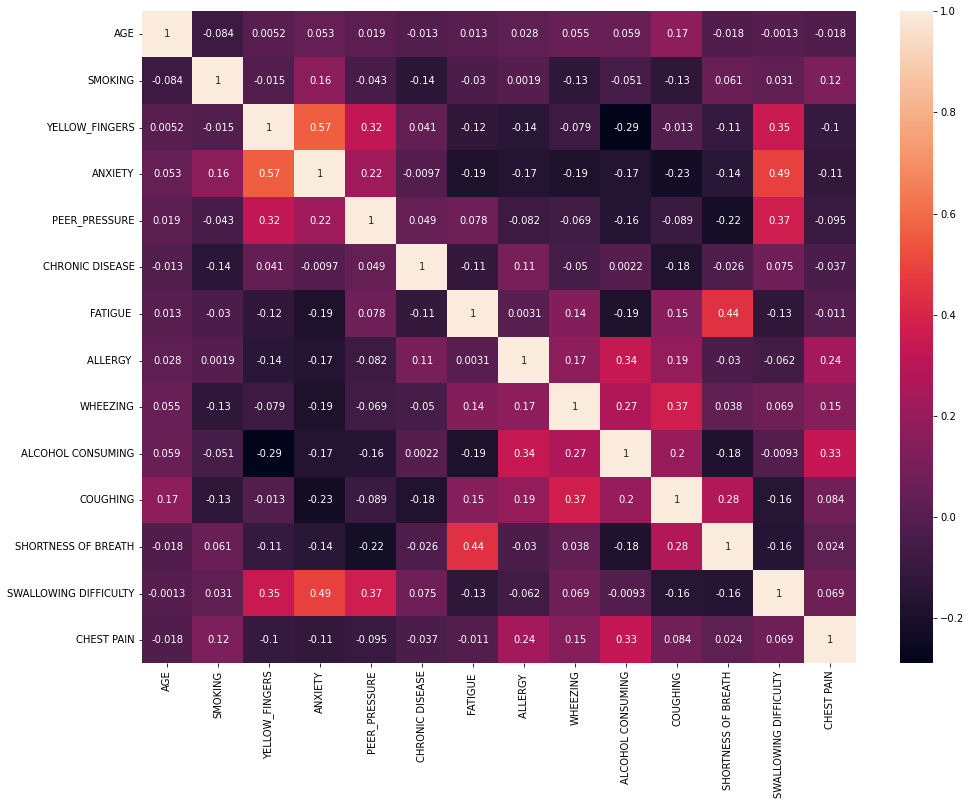

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot = True)

Наблюдается корелляция выше 50% между желтыми пальцами и тревогой

In [ ]:
data.drop_duplicates(keep = 'first', inplace = True)

# 2. Анализ данных

In [ ]:
print(data.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
107,F,60,2,2,2,2,2,1,2,2,2,1,1,2,2,YES
14,M,69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO
37,F,56,1,1,1,1,2,1,1,2,1,1,2,2,1,NO
81,F,54,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
189,F,67,2,2,2,2,1,2,1,1,1,1,1,1,1,YES


**Numerical Features**: Age (Continuous)

**Categorical Features**: gender, smoking, yellow_fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol consuming, coughing, shortness of breath, swallowing difficulty, chest pain, lung_cancer

**What are the data types for each feature?**

Age:int

gender:object

smoking:int 

yellow_fingers:int

anxiety:int

peer pressure:int 

chronic disease:int 

fatigue:int 

allergy:int 

wheezing:int 

alcohol consuming:int 

coughing:int 

shortness of breath:int 

swallowing difficulty:int 

chest pain:int 

lung_cancer:int

***Теперь преобразуем категориальные данные типа object в данные типа int***

# 3. Преобразование данных

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data['GENDER'] = data['GENDER'].replace({'M' : 'Male', 'F': 'Female'})
data['LUNG_CANCER'] = LabelEncoder.fit_transform(data['LUNG_CANCER'])

data = pd.get_dummies(data, columns=['GENDER'])
data.rename(columns={'GENDER_Male' : 'Male', 'GENDER_Female' : 'Female'}, inplace= True)

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Female,Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [ ]:
data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Female,Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


# Разбиение выборки

In [ ]:
data.shape

(276, 17)

In [ ]:
x= data.drop(['LUNG_CANCER'], axis=1)
x.tail()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Female,Male
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1,0
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1,0
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0,1
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0,1
283,60,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1


In [ ]:
y = data['LUNG_CANCER']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_gaussian)

83.93


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test)*100, 2)
print(acc_logreg)

89.29


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

83.93


In [ ]:
#Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_lin_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_lin_svc)

80.36


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#Perception
from sklearn.linear_model import Perceptron

percep = Perceptron()
percep.fit(x_train, y_train)
y_pred = percep.predict(x_test)
acc_percep = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_percep)

83.93


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

91.07


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

91.07


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test)* 100, 2) 
print(acc_knn)

82.14


In [ ]:
#Stochastic Gradient Decsent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

83.93


In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
acc_gbc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbc)

89.29


In [ ]:
#Cat Boost
from catboost import CatBoostClassifier, CatBoostRegressor

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
acc_cat = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_cat)

Learning rate set to 0.005397
0:	learn: 0.6882964	total: 1.49ms	remaining: 1.49s
1:	learn: 0.6831396	total: 3.84ms	remaining: 1.92s
2:	learn: 0.6785409	total: 5.19ms	remaining: 1.73s
3:	learn: 0.6735256	total: 7.69ms	remaining: 1.91s
4:	learn: 0.6687963	total: 9.52ms	remaining: 1.89s
5:	learn: 0.6628564	total: 11.1ms	remaining: 1.83s
6:	learn: 0.6579400	total: 12.4ms	remaining: 1.75s
7:	learn: 0.6524733	total: 13.9ms	remaining: 1.72s
8:	learn: 0.6469520	total: 15ms	remaining: 1.65s
9:	learn: 0.6433344	total: 15.5ms	remaining: 1.54s
10:	learn: 0.6400743	total: 16.1ms	remaining: 1.44s
11:	learn: 0.6356632	total: 17.5ms	remaining: 1.44s
12:	learn: 0.6312062	total: 18.8ms	remaining: 1.43s
13:	learn: 0.6264261	total: 20.1ms	remaining: 1.42s
14:	learn: 0.6212469	total: 21.5ms	remaining: 1.41s
15:	learn: 0.6163519	total: 22.8ms	remaining: 1.4s
16:	learn: 0.6116108	total: 24.3ms	remaining: 1.4s
17:	learn: 0.6069673	total: 25.6ms	remaining: 1.39s
18:	learn: 0.6029018	total: 26.9ms	remaining: 1.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier', 'CatBoost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_percep,acc_lin_svc, acc_decisiontree,
              acc_sgd, acc_gbc, acc_cat]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,91.07
7,Decision Tree,91.07
2,Logistic Regression,89.29
9,Gradient Boosting Classifier,89.29
10,CatBoost,89.29
0,Support Vector Machines,83.93
4,Naive Bayes,83.93
5,Perceptron,83.93
8,Stochastic Gradient Descent,83.93
1,KNN,82.14
